<h1>Selección de componentes pricipales con Hocking</h1>


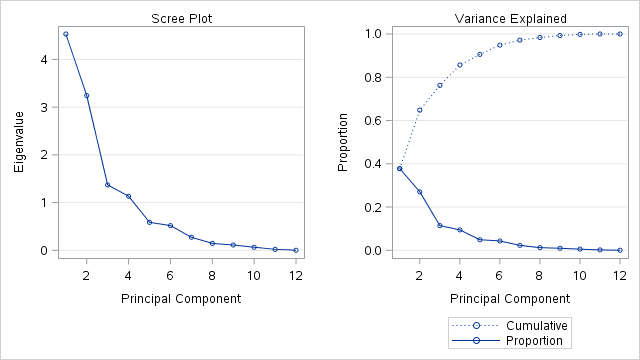
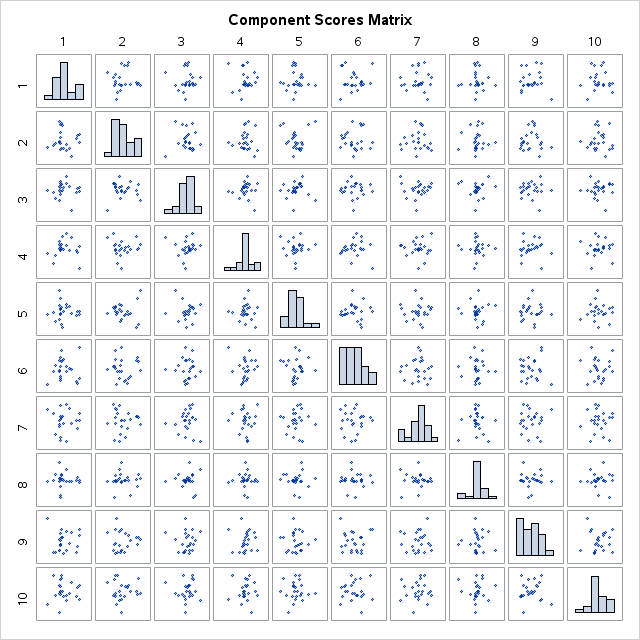
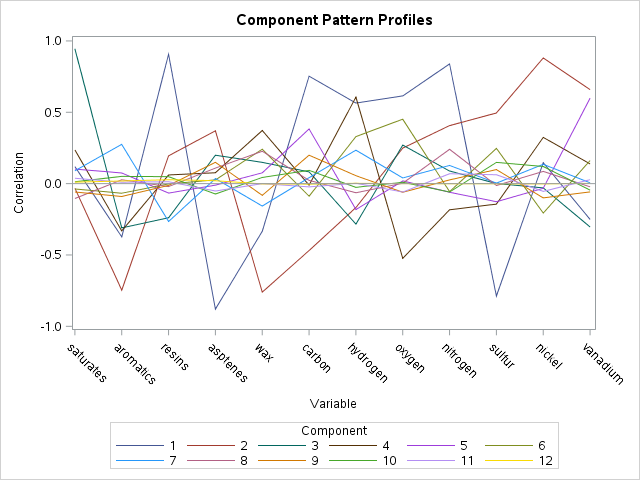
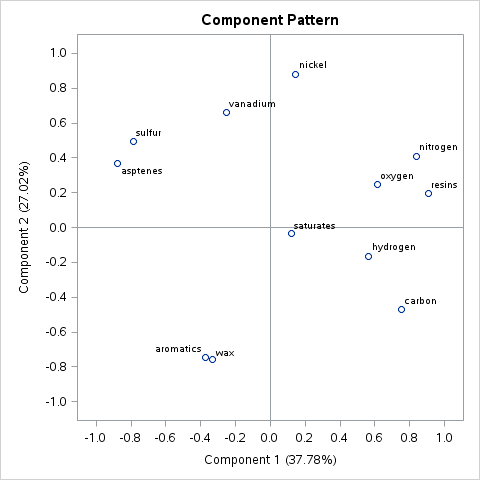
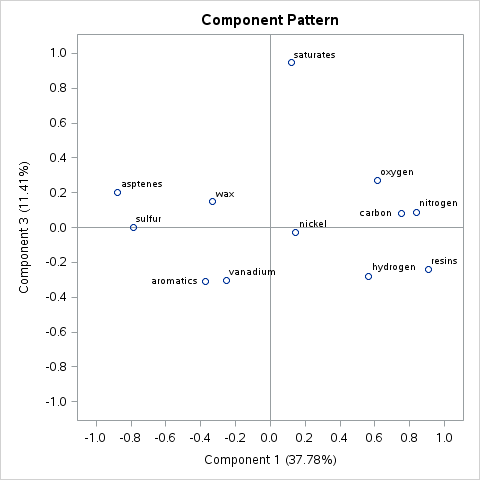
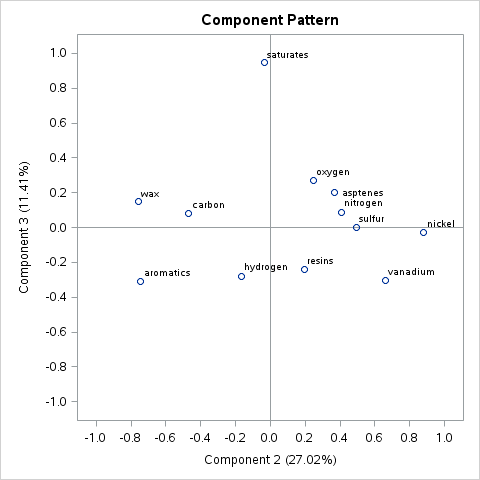
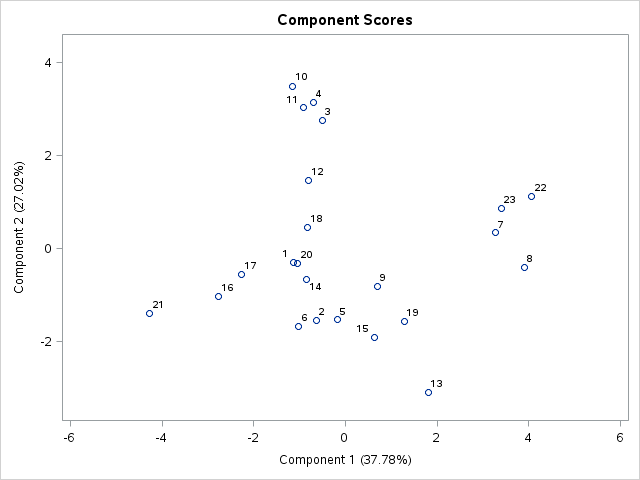
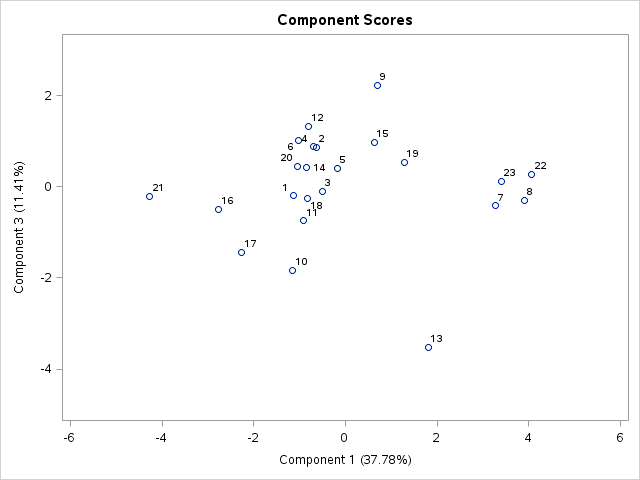
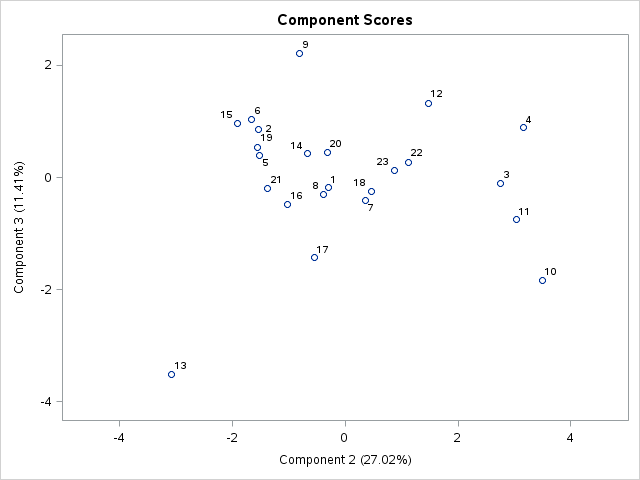
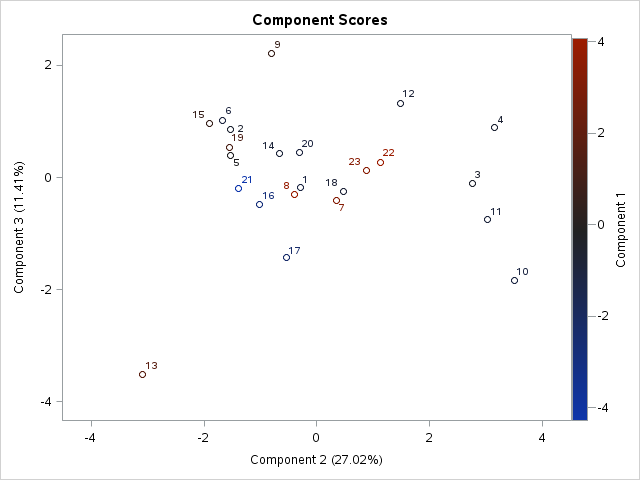
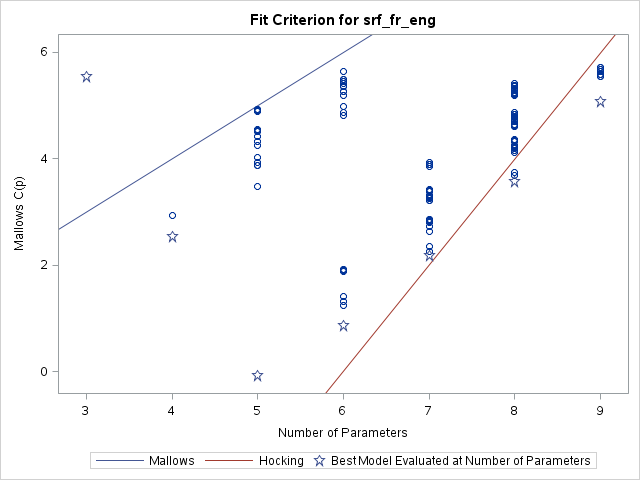
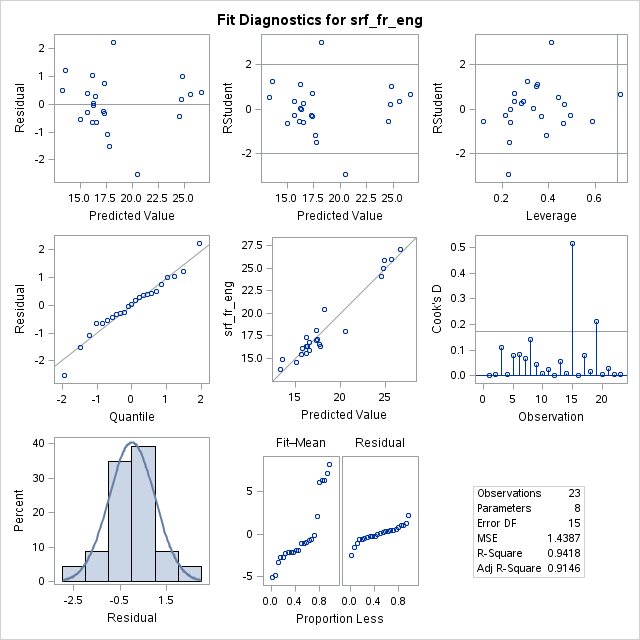
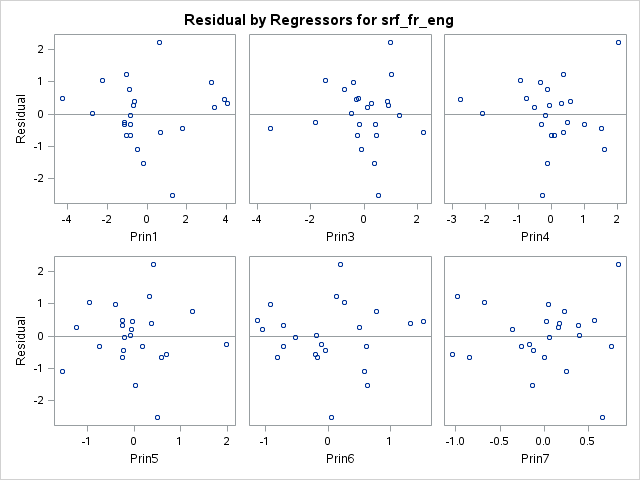
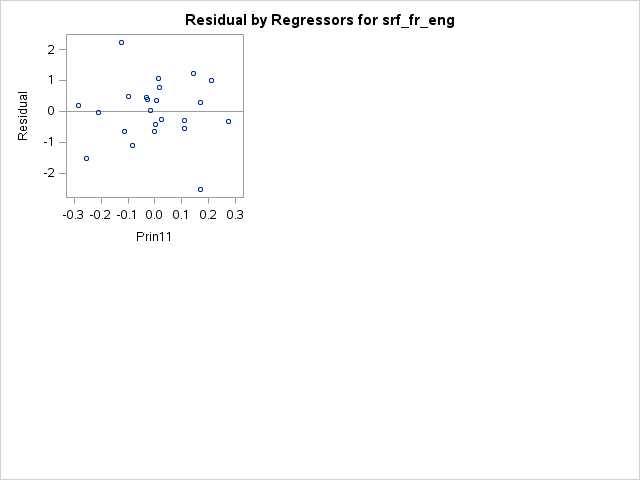

In [1]:
proc import out= work.data
datafile= "/folders/myfolders/Econometria/asphalt_binder.csv" 
dbms=csv replace; getnames=yes; datarow=2; 
run;


proc import out= work.datac
datafile= "/folders/myfolders/Econometria/asphalt_binder2.csv" 
dbms=csv replace; getnames=yes; datarow=2; 
run;


%let xlist = saturates aromatics resins asptenes wax carbon hydrogen oxygen nitrogen sulfur nickel vanadium;


proc princomp data=datac
   n=12
   plots(ncomp=3)=all
   out=datap;
   run;
quit;

data newdata;
merge data datap;
run;
quit;


ods graphics / imagemap=on ;
proc reg data=work.newdata plots(only)=(cp);   model srf_fr_eng=prin1 prin2 prin3 prin4 prin5 prin6 prin7 prin8 prin9 prin10 prin11 prin12 / selection=cp rsquare adjrsq ;
title 'Mejor modelo (Hocking) utilizando todos las opciones de regresion con interceptor ';
run;
quit;


PROC REG DATA =WORK.newdata ; 
	model srf_fr_eng = prin1 prin3 prin4 prin5 prin6 prin7 prin11/ VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;


proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;
